In [ ]:
# Libraries for data handling and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

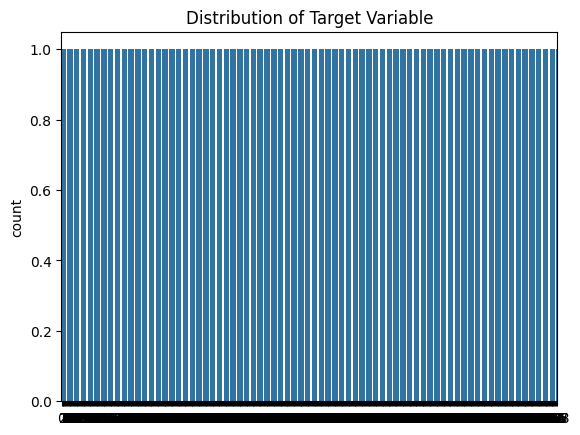

In [ ]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of target variable
sns.countplot(df['label'])
plt.title('Distribution of Target Variable')
plt.show()


In [ ]:
# Feature-target split
X = df.drop(columns='label')
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Train set size: {X_train.shape}, Test set size: {X_test.shape}")


Train set size: (455, 30), Test set size: (114, 30)


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Accuracy scores
print("Logistic Regression Accuracy on Train Data:", accuracy_score(y_train, y_train_pred))
print("Logistic Regression Accuracy on Test Data:", accuracy_score(y_test, y_test_pred))


Logistic Regression Accuracy on Train Data: 0.9868131868131869
Logistic Regression Accuracy on Test Data: 0.9736842105263158


In [ ]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_tree_test_pred = tree_model.predict(X_test)
print("Decision Tree Accuracy on Test Data:", accuracy_score(y_test, y_tree_test_pred))


Decision Tree Accuracy on Test Data: 0.9473684210526315


In [ ]:
# SVM Classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_svm_test_pred = svm_model.predict(X_test)
print("SVM Accuracy on Test Data:", accuracy_score(y_test, y_svm_test_pred))


SVM Accuracy on Test Data: 0.956140350877193


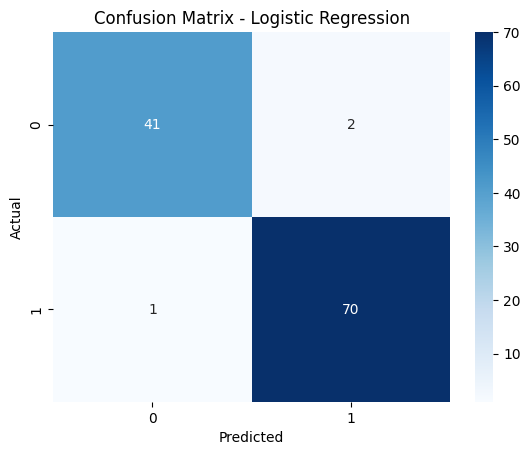

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


In [ ]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_test_pred))

# ROC-AUC Score
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_prob))


In [ ]:
# Example input data
input_data = (13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
              0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023,
              15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259)

# Convert to numpy array and reshape
input_data_reshaped = scaler.transform(np.asarray(input_data).reshape(1, -1))

# Prediction
prediction = logistic_model.predict(input_data_reshaped)
if prediction[0] == 0:
    print("The Breast Cancer is Malignant")
else:
    print("The Breast Cancer is Benign")


The Breast Cancer is Benign


In [ ]:
import joblib

# Save model and scaler
joblib.dump(logistic_model, 'model.pkl')


['model.pkl']

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']